# Project 1 Report -  Dean Knudson

## Overview

For my third year project I have continued working with David Rozado on a Sentiment Analysis Engine.

Last semester, as part of a special topic study, I began learning about, and creating models for, Sentiment Analysis. The intentions of this project were to create a model that would correctly predict the sentiment of a given piece of text 80% of time. David offered for me to continue working on the problem this semester. Due to to the fact I didn't achieve the result above and the availability of recent advancements in the field of NLP, I accepted.

More details on my work last semester can be found 
[here](https://github.com/knuddj1/Sentiment-Analysis/blob/master/recap%20stuff/semester_recap.ipynb)

The official objective of this project is to create a Sentiment Analysis Engine that is able to correctly classify the sentiment of a piece of text into 1 of 3 possible classes (negative, neutral, positive) at a greater, equal or close to equal accuracy as the current state of art sentiment analysis systems. 

This notebook covers the processes I underwent as part of this project. Each section is listed below:

1. [Dataset](#Dataset)
    - [Data Collection](#Data-Collection)
    - [Constructing a Custom Dataset](#Constructing-a-Custom-Dataset)
    - [Preparing Dataset](#Preparing-Dataset)

2. [Modeling](#Modeling)
    - [Establishing Baselines](#Establishing-Baselines)
    - TODO
    - TODO

3. TODO
    - TODO
    - TODO

# Dataset

## Data Collection

The intial task of a machine learning project is to obtain a dataset, or in this case I used **mutliple** datasets and created a new dataset out of these combined.

David advised me to read [this](https://monkeylearn.com/sentiment-analysis/) website as a refresher to refamiliarize myself with the world of sentiment analysis. This website also offered download links to their favourite datasets for experimenting with sentiment analysis and a machine learning approach.

#### Datasets found at monkeylearn.com:
    
[Amazon Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews/)
>This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all 500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

[Amazon Reviews for Sentiment Analysis](https://www.kaggle.com/bittlingmayer/amazonreviews/)
>This dataset consists of a few million Amazon customer reviews (input text) and star ratings (output labels) for learning how to train fastText for sentiment analysis.
The idea here is a dataset is more than a toy - real business data on a reasonable scale - but can be trained in minutes on a modest laptop.

[Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment/)
>A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets

#### Datasets found elsewhere:

[sentiment140](http://help.sentiment140.com/)
>It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment. Sentiment140 was created by Alec Go, Richa Bhayani, and Lei Huang, who were Computer Science graduate students at Stanford University.

[Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/)
>Obtained from IMDB movie reviews, this is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.

#### Considered but not used

Both of these were found on monkeylearn.com.

[First GOP Debate Twitter Sentiment](https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment/)
>We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset

I chose not to use this dataset because it offered lots of samples in this dataset were not correctly labeled. It was unreliable.



[Yelp Dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset)
>This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset you'll find information about businesses across 11 metropolitan areas in four countries.

I didnt use this dataset because I couldnt get it to load properly. There was something wrong with the file that prevented me from actually parsing the data.

## Constructing a Custom Dataset

#TODO

## Preparing Dataset

#TODO

# Modeling 

<h2>Establishing Baselines</h2>

A solid baseline on any machine learning project is a great reference when attemping to validate a future models performance. If I was to use a random baseline for this project I would expect to get results of around 33% because there are 3 distinct categories.

To validate future models I chose to use four baselines. Three of these were python recommended by David which he was using in his research and the other being the best model from my project last semester. Below are the results of these models tested the five test-sets that I generated during the dataset construction phase. 

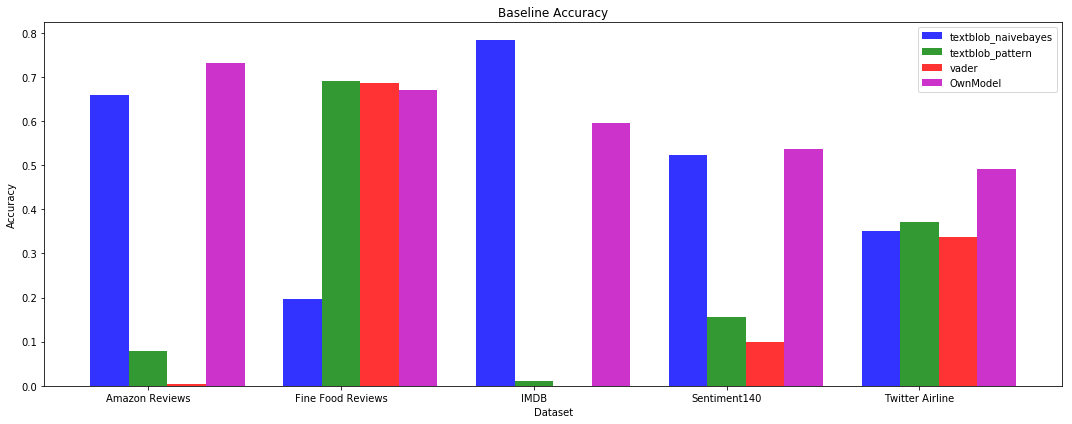

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("baseline_results.csv")
classifiers = list(df["classifier"])
df.drop(['overall'], axis=1, inplace=True)
headers = list(df)[:-1]
data = df.loc[:, df.columns != 'classifier']

colours = ['b', 'g', 'r', 'm']
 
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
index = np.arange(len(headers))
bar_width = 0.2
opacity = 0.8
 
for idx, (classifier, (i,results))  in enumerate(zip(classifiers, data.iterrows())):
    plt.bar(
        index + bar_width * idx,
        results,
        bar_width,
        alpha=opacity,
        color=colours[idx],
        label=classifier
    )
 
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Baseline Accuracy')
plt.xticks(index + bar_width, headers)
plt.legend()
 
plt.tight_layout()
plt.show()

From the results above its clear the classifiers with the most competitive results are textblob-naivebayes, achieving an overall accuracy of 50% on all test datasets and my own model which had an overall accuracy of 60%. These are great starting points for me to validate the performance of my future models. 

As for the textblob-pattern and vader classifiers, I am really surprised at their results on some of the datasets. As I stated above a purely _random_ baseline would be expected to achieve results of 33% on each dataset. However, on 3/5 of these datasets they had an accuracy below a random baseline. I dont know why this is the case. If I was to take a guess as to why this happened it would be that the inputs from those datasets are too large for these classifiers to handle and they are designed for smaller sequences of text.  